In [ ]:
%%sh
pip3.9 install plotly
pip3.9 install numpy
pip3.9 install seaborn

In [51]:
import json
import os
root = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))

with open(root+'/.dfx/local/canister_ids.json') as f:
    canisters = json.load(f)
print(canisters)

{'F-NFT': {'local': 'rrkah-fqaaa-aaaaa-aaaaq-cai'}, '__Candid_UI': {'local': 'rkp4c-7iaaa-aaaaa-aaaca-cai'}, 'dataNFT_backend': {'local': 'ryjl3-tyaaa-aaaaa-aaaba-cai'}, 'dataNFT_frontend': {'local': 'r7inp-6aaaa-aaaaa-aaabq-cai'}}


In [52]:
from ic.client import Client
from ic.identity import Identity
from ic.agent import Agent
# Identity and Client are dependencies of Agent
iden = Identity(privkey = "833fe62409237b9d62ec77587520911e9a759cec1d19755b7da901b96dca3d42")
client = Client(url = "http://127.0.0.1:8000")
# client = Client(url = "https://ic0.app")
agent = Agent(iden, client)
datasetId = 1

In [53]:
from ic.candid import encode, decode, Types
params = [
	{'type': Types.Nat32, 'value': datasetId}
]
asset_canister = canisters["dataNFT_backend"]["local"]
config = agent.query_raw(canisters["dataNFT_backend"]["local"], "getDatasetByDatasetId", encode(params))
data = agent.query_raw(canisters["dataNFT_backend"]["local"], "getDataByDatasetId", encode(params))

In [54]:
configClean = {}
for dim in config[0]['value'][0]["_3701456461"]:
    configClean[dim["_791060705"]] = dim["_272307608"]
print(configClean)

def cleanRecord(row):
    new_record = {"id": row["_23515"]["_23515"]}
    for item in row["_1337394146"]:
        col = configClean[item["_791060705"]]
        val = item["_834174833"]['_4210061340'] if '_4210061340' in item["_834174833"] else item["_834174833"]['_157452336']
        new_record[col] = val
    return new_record
datasetClean = list(map(cleanRecord, data[0]['value'][0]))


{0: 'gender', 1: 'ethnicity', 2: 'parental_education', 3: 'lunch', 4: 'preparation_course', 5: 'math_score', 6: 'reading_score', 7: 'writing_score'}


In [55]:
# properly store dataset dynamically
# - not a (incorrectly formatted) file
# - preserves types
import pandas as pd
data = pd.DataFrame(datasetClean)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  996 non-null    int64 
 1   gender              996 non-null    object
 2   ethnicity           996 non-null    object
 3   parental_education  996 non-null    object
 4   lunch               996 non-null    object
 5   preparation_course  996 non-null    object
 6   math_score          996 non-null    int64 
 7   reading_score       996 non-null    int64 
 8   writing_score       996 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 70.2+ KB


,id,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
0,12244,male,group A,some college,standard,completed,65,60,62
1,77325,female,group C,some college,standard,none,73,74,82
2,82847,female,group C,some high school,free/reduced,none,32,35,41
3,74978,male,group D,associate's degree,free/reduced,completed,85,91,92
4,9810,male,group C,high school,standard,none,73,70,65


In [56]:
import plotly.express as px
fig2 = px.pie(data, values = data['parental_education'].value_counts().values, names = data['parental_education'].value_counts().index)
fig2.show()

<AxesSubplot: xlabel='math_score', ylabel='reading_score'>

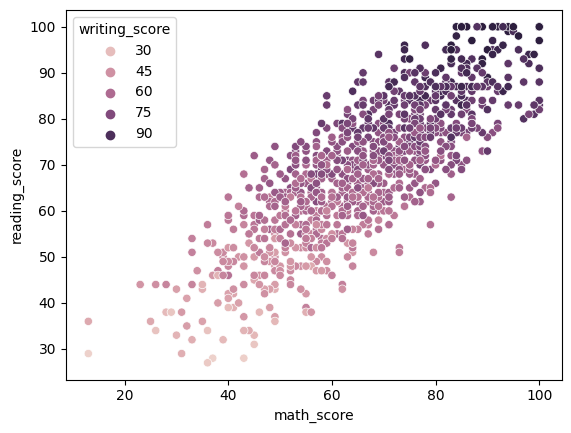

In [57]:
import seaborn as sns
sns.scatterplot(x = data.math_score, y = data.reading_score, hue = data.writing_score)

In [50]:
# Same with agreagate endpoint
# - protect your IP, individuals
# - LoD limit
# - permissioned attributes (HR/perf)
params = [
	{'type': Types.Nat32, 'value': datasetId},
	{'type': Types.Nat32, 'value': 1}, # dimentionId - Attribute 
	{'type': Types.Nat32, 'value': 6}, # dimentionId - Metric
]
data = agent.query_raw(canisters["dataNFT_backend"]["local"], "getGDPRAggregatedDataset", encode(params))
print(data)


[{'type': 'rec_68', 'value': [[{'_4210061340': 'group A'}, {'_5745035': 88, '_1248019663': 1}], [{'_4210061340': 'group A'}, {'_5745035': 61, '_1248019663': 1}], [{'_4210061340': 'group A'}, {'_5745035': 67, '_1248019663': 1}], [{'_4210061340': 'group A'}, {'_5745035': 64, '_1248019663': 1}], [{'_4210061340': 'group A'}, {'_5745035': 87, '_1248019663': 1}], [{'_4210061340': 'group A'}, {'_5745035': 73, '_1248019663': 1}], [{'_4210061340': 'group A'}, {'_5745035': 51, '_1248019663': 1}], [{'_4210061340': 'group A'}, {'_5745035': 40, '_1248019663': 1}], [{'_4210061340': 'group A'}, {'_5745035': 81, '_1248019663': 1}], [{'_4210061340': 'group A'}, {'_5745035': 66, '_1248019663': 1}], [{'_4210061340': 'group A'}, {'_5745035': 59, '_1248019663': 1}], [{'_4210061340': 'group A'}, {'_5745035': 72, '_1248019663': 1}], [{'_4210061340': 'group A'}, {'_5745035': 57, '_1248019663': 1}], [{'_4210061340': 'group A'}, {'_5745035': 70, '_1248019663': 1}], [{'_4210061340': 'group A'}, {'_5745035': 64, 

In [26]:
# Data producer example
# - non static dataset
params = [
	{'type': Types.Nat32, 'value': 1},
]
result = agent.update_raw(canisters["dataNFT_backend"]["local"], "putEntry", encode(params))

[{'type': 'rec_20', 'value': []}]


In [27]:
# Data deletion
# - right to be forgotten, GDPR
# - corrupted datapoint(s)
params = [
	{'type': Types.Nat32, 'value': 1},
]
result = agent.update_raw(canisters["dataNFT_backend"]["local"], "deleteUserEntry", encode(params))
result = agent.update_raw(canisters["dataNFT_backend"]["local"], "deleteAllEntriesOfUser", encode(params))

In [21]:
# logging
# - dataset usage, cost analysis
# - incident analysis at record level

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  996 non-null    int64 
 1   gender              996 non-null    object
 2   ethnicity           996 non-null    object
 3   parental_education  996 non-null    object
 4   lunch               996 non-null    object
 5   preparation_course  996 non-null    object
 6   math_score          996 non-null    int64 
 7   reading_score       996 non-null    int64 
 8   writing_score       996 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 70.2+ KB


In [20]:
# Log example


In [ ]:
# next steps:
# - loader
# - consumer rules
# - http outcalls to AWS/ML